In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [2]:
train_data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor()
)
test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
batch_size = 32

train_loader = DataLoader(train_data, batch_size=batch_size)
test_loader = DataLoader(test_data, batch_size=2*batch_size)

for x, y in test_loader:
    print(f'shape of X: {x.shape}')
    print(f'shape of y: {y.shape}')
    break


shape of X: torch.Size([64, 1, 28, 28])
shape of y: torch.Size([64])


In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('using', device)

using cuda


In [5]:
# model definition

class NeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )
    
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [8]:
model = NeuralNet().to(device)
print(model)

NeuralNet(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [9]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [10]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (x, y) in enumerate(dataloader):
        x, y = x.to(device), y.to(device)
        
        pred = model(x)
        loss = loss_fn(pred, y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if batch % 100 == 0:
            loss, current = loss.item(), batch*len(x)
            print('loss:', loss, '<->', current,'/',size)

In [13]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for x, y in dataloader:
            x, y = x.to(device), y.to(device)
            pred = model(x)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
        test_loss /= num_batches
        correct /= size
        print('acc', correct, 'loss', test_loss)

In [15]:
epochs = 5
for t in range(epochs):
    train(train_loader, model, loss_fn, optimizer)
    test(test_loader, model, loss_fn)

loss: 2.3173344135284424 <-> 0 / 60000
loss: 2.3126041889190674 <-> 3200 / 60000
loss: 2.2894814014434814 <-> 6400 / 60000
loss: 2.250173330307007 <-> 9600 / 60000
loss: 2.2557995319366455 <-> 12800 / 60000
loss: 2.232532501220703 <-> 16000 / 60000
loss: 2.2056796550750732 <-> 19200 / 60000
loss: 2.194949150085449 <-> 22400 / 60000
loss: 2.2077085971832275 <-> 25600 / 60000
loss: 2.129730701446533 <-> 28800 / 60000
loss: 2.0934345722198486 <-> 32000 / 60000
loss: 2.063632011413574 <-> 35200 / 60000
loss: 2.1673035621643066 <-> 38400 / 60000
loss: 2.067657947540283 <-> 41600 / 60000
loss: 2.031996726989746 <-> 44800 / 60000
loss: 2.005448341369629 <-> 48000 / 60000
loss: 2.093677282333374 <-> 51200 / 60000
loss: 1.9797405004501343 <-> 54400 / 60000
loss: 1.8924217224121094 <-> 57600 / 60000
acc 0.5745 loss 1.8991244940241432
loss: 1.8840534687042236 <-> 0 / 60000
loss: 1.927475094795227 <-> 3200 / 60000
loss: 1.8352545499801636 <-> 6400 / 60000
loss: 1.7787264585494995 <-> 9600 / 60000


In [16]:
model_name = 'model.pth'
torch.save(model.state_dict(), model_name)
print('model saved in', model_name)

model saved in model.pth


In [17]:
model = NeuralNet()
model.load_state_dict(torch.load(model_name))
model

NeuralNet(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)

In [20]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')


Predicted: "Ankle boot", Actual: "Ankle boot"


In [21]:
import matplotlib.pyplot as plt

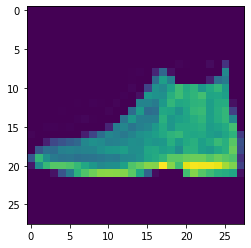

In [24]:
plt.imshow(x.squeeze());